In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch import squeeze
from sklearn.metrics import mean_squared_error

### Problem 1

In [11]:
tempX = np.random.uniform(-1,1,2000)
tempY = np.random.uniform(-1,1,2000)

myX = np.array([tempX, tempY]).T

def myfunc(X):
    
    return X[:,0]**2  - X[:,1]**2

myy = myfunc(myX)

#### 1.1

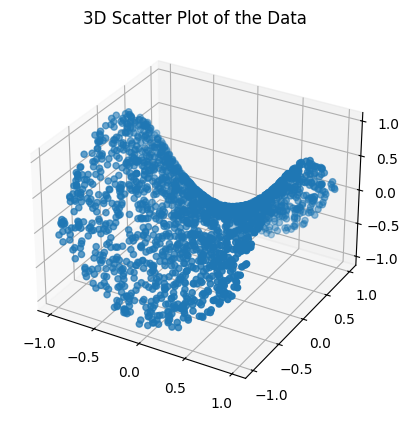

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(myX[:,0], myX[:,1], myy)
plt.title('3D Scatter Plot of the Data')
plt.show()

#### 1.2

In [13]:
myXtensor = torch.from_numpy(myX)
myytensor = torch.from_numpy(myy)
train_ds = torch.utils.data.TensorDataset(myXtensor, myytensor)
batch_size = 5
#train_ds[:5]
train_dl = torch.utils.data.DataLoader(train_ds, batch_size, shuffle=True)
#len(train_dl.dataset)

In [14]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)  
        self.layer2 = nn.Linear(hidden_size, hidden_size) 
        self.layer3 = nn.Linear(hidden_size, hidden_size) 
        self.layer4 = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        x = self.layer1(x)
        x = nn.ReLU()(x)
        x = self.layer2(x)
        x = nn.ReLU()(x)
        x = self.layer3(x)
        x = nn.ReLU()(x)
        x = self.layer4(x)
        return x
        
input_size = 2
hidden_size = 32
output_size = 1
 
model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.MSELoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [15]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
loss_items = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = squeeze(model(x_batch.float()))
        # print(pred.shape)
        # break
        loss = loss_fn(pred, y_batch.float())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)
    loss_items[epoch] = loss.item()
    if (epoch+1)%5==0:
        print('Epoch', epoch+1, ': loss_item =', loss.item(), '| loss_hist =', loss_hist[epoch])

Epoch 5 : loss_item = 0.0003241729864384979 | loss_hist = 0.00026075901873809924
Epoch 10 : loss_item = 0.0013978832866996527 | loss_hist = 0.0004029194308839124
Epoch 15 : loss_item = 0.00018063720199279487 | loss_hist = 0.00027764390838797226
Epoch 20 : loss_item = 0.00014104362344369292 | loss_hist = 0.00019755702013640075
Epoch 25 : loss_item = 0.00011567251931410283 | loss_hist = 0.00022317634963542332
Epoch 30 : loss_item = 0.00011892376642208546 | loss_hist = 0.0003976641073592191
Epoch 35 : loss_item = 0.00023168038751464337 | loss_hist = 0.00013499055909932167
Epoch 40 : loss_item = 5.501729901880026e-05 | loss_hist = 0.00018864955212052336
Epoch 45 : loss_item = 5.024940037401393e-05 | loss_hist = 0.000148967229227992
Epoch 50 : loss_item = 4.173122579231858e-05 | loss_hist = 0.0001336295779736929
Epoch 55 : loss_item = 5.5545056966366246e-05 | loss_hist = 0.0003078225600927453
Epoch 60 : loss_item = 6.938118895050138e-05 | loss_hist = 0.00014933431133727027
Epoch 65 : loss_i

#### 1.3

Difference between loss_items and loss_hist:
- The loss_items is only taking into account for the MSE of the last/most recent batch of each epoch. It can still use to represent the loss because the MSE of a sample can be said to be a good estimate of the MSE for the whole dataset.
- The loss_hist is the actual MSE for the whole dataset of each epoch. We can say that loss_items is the estimate of loss_hist.

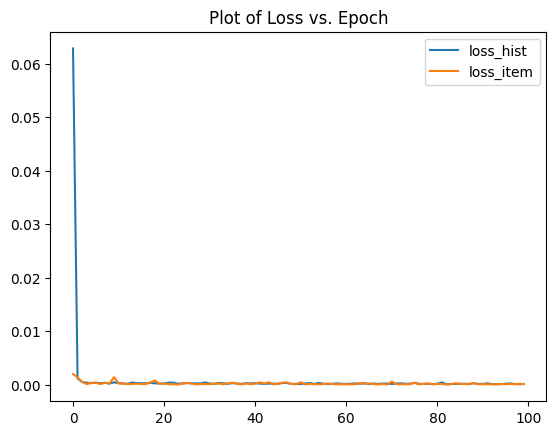

In [16]:
plt.plot(range(num_epochs), loss_hist, label='loss_hist')
plt.plot(range(num_epochs), loss_items, label='loss_item')
plt.title('Plot of Loss vs. Epoch')
plt.legend(loc = 'upper right')

#### 1.4

While setting aside data for testing is usually essential, it's unnecessary here due to the specific characteristics involved. Firstly, the function myfunc is deterministic, always producing the same output for a given input. Secondly, the data points (tempX and tempY) are generated independently from a uniform distribution, covering the entire relevant range (-1 to 1) with equal probability. This combination ensures that any data point within the generated set behaves identically under the function. Essentially, the uniform distribution guarantees any new data point from the same range will exhibit the same behavior. Therefore, testing on a separate set becomes redundant as it wouldn't reveal any new information about the function's performance. This scenario, however, is an exception. In most real-world cases, testing on unseen data remains crucial to assess model generalizability and robustness in handling complexities and inherent randomness.

In [17]:
ttempX = np.random.uniform(-1,1,500)
ttempY = np.random.uniform(-1,1,500)

testX = np.array([ttempX, ttempY]).T
testy = myfunc(testX)
testX.shape

(500, 2)

In [18]:
testXtensor = torch.from_numpy(testX)
testytensor = torch.from_numpy(testy)
pred_test = squeeze(model.forward(testXtensor.float()))
tloss = loss_fn(pred_test, testytensor.float()).item()
print('The loss of testing data using loss_fn():', tloss)

The loss of testing data using loss_fn(): 0.00024798695812933147


In [22]:
0.00024798695812933147-0.00010231433109879618

0.0001456726270305353

The MSE for the testing data is only about $0.0001$ higher than the MSE for the training data which can be said to be not a big of a difference.

The SKLearn mean_squared_error doesn't work and give error when tryting to cast from tensor to numpy. To fix it the, based on the error message, we need to use tensor.detach().numpy() instead, which shown below.

In [21]:
skMSE = mean_squared_error(pred_test.detach().numpy(), testy)
print('The loss of testing data using SKLearn mean_squared_error:', skMSE)

The loss of testing data using SKLearn mean_squared_error: 0.00024798698493634283


### Problem 2

#### 2.1

In [5]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import DataLoader, TensorDataset
from mlxtend.plotting import plot_decision_regions

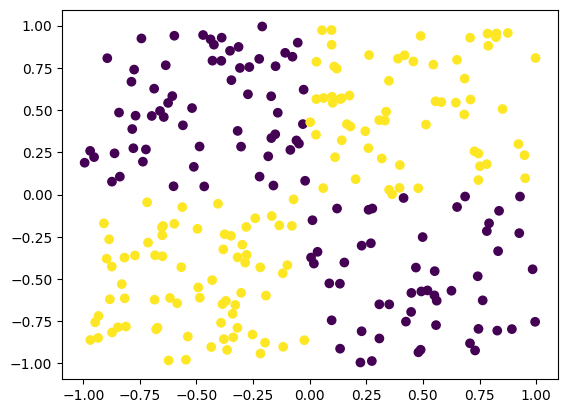

In [156]:
x1 = np.random.uniform(-1,1,250)
x2 = np.random.uniform(-1,1,250)
x = np.array([x1, x2]).T
y = np.zeros(250)
y[((x1 < 0) & (x2 < 0)) | ((x1 > 0) & (x2 > 0))] = 1

x_train = torch.tensor(x, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

plt.scatter(x1, x2, c= y)
plt.show()

In [157]:
train_ds = TensorDataset(x_train, y_train)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [158]:
torch.manual_seed(1)
num_epochs = 200
def train(model, num_epochs, train_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()

        loss_hist_train[epoch] /= 250/batch_size
        accuracy_hist_train[epoch] /= 250/batch_size

        if (epoch+1)%10==0:
             print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} '
              f'| Train Loss: {loss_hist_train[epoch]:.2f} '
              f'| Train Acc: {accuracy_hist_train[epoch]*100:.2f}% ')
            
    return accuracy_hist_train

In [44]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 8)
        a2 = nn.ReLU()
        l3 = nn.Linear(8, 1)
        a3 = nn.Sigmoid()
        l = [l1, a1, l2, a2, l3, a3]
        self.module_list = nn.ModuleList(l)

    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        return x
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred>=0.5).float()
            
model = MyModule()
model

MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [160]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)
    
history = train(model, num_epochs, train_dl)

Epoch: 010/200 | Train Loss: 0.62 | Train Acc: 82.80% 
Epoch: 020/200 | Train Loss: 0.39 | Train Acc: 83.60% 
Epoch: 030/200 | Train Loss: 0.35 | Train Acc: 82.80% 
Epoch: 040/200 | Train Loss: 0.34 | Train Acc: 84.80% 
Epoch: 050/200 | Train Loss: 0.32 | Train Acc: 86.80% 
Epoch: 060/200 | Train Loss: 0.29 | Train Acc: 87.20% 
Epoch: 070/200 | Train Loss: 0.22 | Train Acc: 91.20% 
Epoch: 080/200 | Train Loss: 0.12 | Train Acc: 94.40% 
Epoch: 090/200 | Train Loss: 0.09 | Train Acc: 97.20% 
Epoch: 100/200 | Train Loss: 0.07 | Train Acc: 98.40% 
Epoch: 110/200 | Train Loss: 0.06 | Train Acc: 98.80% 
Epoch: 120/200 | Train Loss: 0.06 | Train Acc: 97.60% 
Epoch: 130/200 | Train Loss: 0.04 | Train Acc: 98.80% 
Epoch: 140/200 | Train Loss: 0.04 | Train Acc: 99.20% 
Epoch: 150/200 | Train Loss: 0.04 | Train Acc: 98.80% 
Epoch: 160/200 | Train Loss: 0.04 | Train Acc: 98.40% 
Epoch: 170/200 | Train Loss: 0.03 | Train Acc: 99.20% 
Epoch: 180/200 | Train Loss: 0.03 | Train Acc: 99.20% 
Epoch: 190

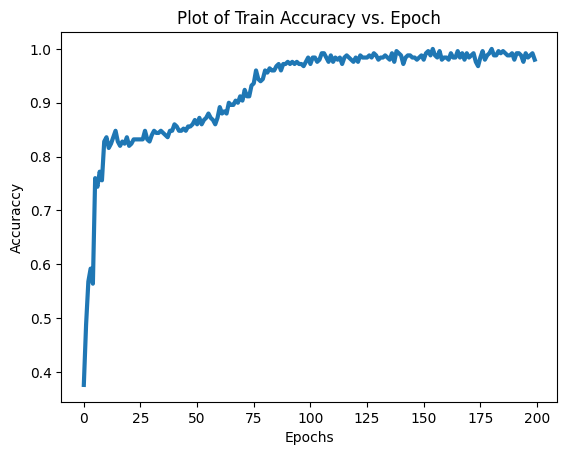

In [161]:
plt.plot(history, lw=3)
plt.xlabel('Epochs', size=10)
plt.ylabel('Accuraccy', size=10)
plt.title('Plot of Train Accuracy vs. Epoch')
plt.show()

In [164]:
tx1 = np.random.uniform(-1,1,250)
tx2 = np.random.uniform(-1,1,250)
tx = np.array([tx1, tx2]).T
ty = np.zeros(250)
ty[((tx1 < 0) & (tx2 < 0)) | ((tx1 > 0) & (tx2 > 0))] = 1

# x_test = torch.tensor(x, dtype=torch.float32)
# y_test = torch.tensor(y, dtype=torch.float32)

y_pred = model.predict(tx)

print(f'The accuracy of the model in predicting the test dataset: {accuracy_score(ty, y_pred)*100:.2f}% ')

The accuracy of the model in predicting the test dataset: 98.80% 


#### 2.2

In [70]:
x1 = np.random.uniform(-1,1,250)
x2 = np.random.uniform(-1,1,250)
x = np.array([x1, x2]).T
y = np.zeros(250)
y[((x1 < 0) & (x2 < 0)) | ((x1 > 0) & (x2 > 0))] = 1

x_train = torch.tensor(x, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

In [71]:
vx1 = np.random.uniform(-1,1,250)
vx2 = np.random.uniform(-1,1,250)
vx = np.array([vx1, vx2]).T
vy = np.zeros(250)
vy[((vx1 < 0) & (vx2 < 0)) | ((vx1 > 0) & (vx2 > 0))] = 1

x_valid = torch.tensor(vx, dtype=torch.float32)
y_valid = torch.tensor(vy, dtype=torch.float32)

In [72]:
train_ds = TensorDataset(x_train, y_train)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [73]:
torch.manual_seed(1)
num_epochs = 200
def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()

        loss_hist_train[epoch] /= 250/batch_size
        accuracy_hist_train[epoch] /= 250/batch_size

        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()

        if (epoch+1)%10==0:
             print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} '
              f'| Train Loss: {loss_hist_train[epoch]:.2f} '
              f'| Train Acc: {accuracy_hist_train[epoch]*100:.2f}% '
              f'| Train Acc: {accuracy_hist_valid[epoch]*100:.2f}% ')
            
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

In [74]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 8)
        a2 = nn.ReLU()
        l3 = nn.Linear(8, 1)
        a3 = nn.Sigmoid()
        l = [l1, a1, l2, a2, l3, a3]
        self.module_list = nn.ModuleList(l)

    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        return x
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred>=0.5).float()
            
model = MyModule()
model

MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [75]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)
    
history = train(model, num_epochs, train_dl, x_valid, y_valid)

Epoch: 010/200 | Train Loss: 0.61 | Train Acc: 72.40% | Train Acc: 77.60% 
Epoch: 020/200 | Train Loss: 0.38 | Train Acc: 83.60% | Train Acc: 83.20% 
Epoch: 030/200 | Train Loss: 0.34 | Train Acc: 86.80% | Train Acc: 83.20% 
Epoch: 040/200 | Train Loss: 0.30 | Train Acc: 87.20% | Train Acc: 87.60% 
Epoch: 050/200 | Train Loss: 0.18 | Train Acc: 92.00% | Train Acc: 96.00% 
Epoch: 060/200 | Train Loss: 0.11 | Train Acc: 96.80% | Train Acc: 97.20% 
Epoch: 070/200 | Train Loss: 0.08 | Train Acc: 98.00% | Train Acc: 98.40% 
Epoch: 080/200 | Train Loss: 0.07 | Train Acc: 98.40% | Train Acc: 98.40% 
Epoch: 090/200 | Train Loss: 0.07 | Train Acc: 97.60% | Train Acc: 98.40% 
Epoch: 100/200 | Train Loss: 0.05 | Train Acc: 98.00% | Train Acc: 98.80% 
Epoch: 110/200 | Train Loss: 0.05 | Train Acc: 96.80% | Train Acc: 98.40% 
Epoch: 120/200 | Train Loss: 0.04 | Train Acc: 99.20% | Train Acc: 98.40% 
Epoch: 130/200 | Train Loss: 0.03 | Train Acc: 99.60% | Train Acc: 98.00% 
Epoch: 140/200 | Train Lo

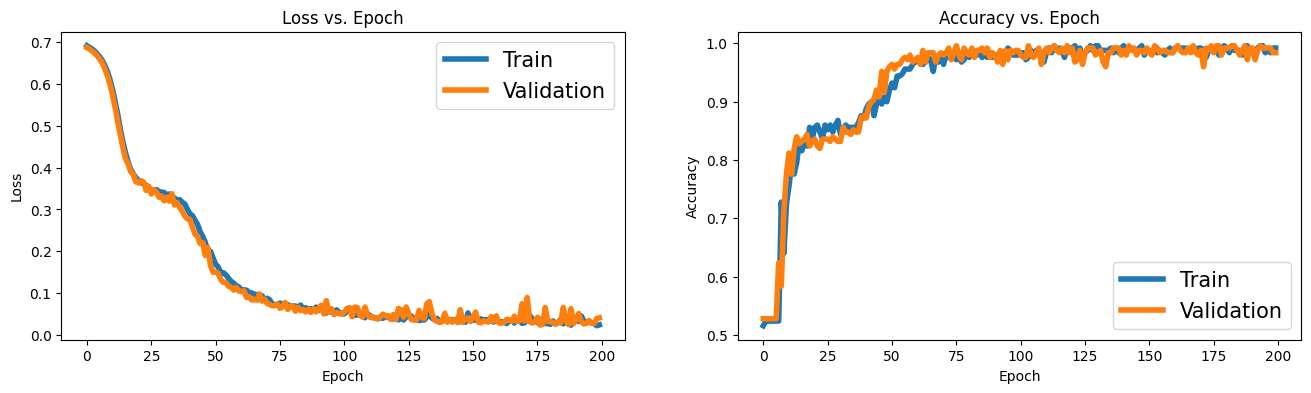

In [77]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train', 'Validation'], fontsize=15)
ax.set_xlabel('Epoch', size=10)
ax.set_ylabel('Loss', size=10)
ax.set_title('Loss vs. Epoch')

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train', 'Validation'], fontsize=15)
ax.set_xlabel('Epoch', size=10)
ax.set_ylabel('Accuracy', size=10)
ax.set_title('Accuracy vs. Epoch')

plt.show()